In [11]:
def gd_linear_regression(X, y, loss='mse', lr=0.01, delta=1.0, max_iters=1000,
                         tol_param=1e-6, tol_loss=1e-8):
    """
    Gradient Descent for linear regression with MSE or Huber loss.
    
    Parameters:
        X : np.array, shape (n_samples, n_features)
        y : np.array, shape (n_samples, 1)
        loss : 'mse' or 'huber'
        lr : learning rate
        delta : Huber loss parameter
        max_iters : max iterations
        tol_param : stop if change in parameters < tol_param
        tol_loss : stop if change in loss < tol_loss
    Returns:
        theta : learned parameters
        losses : list of loss values
        param_deltas : list of parameter changes
        k_param : iteration index where parameter tolerance met
        k_loss : iteration index where loss tolerance met
    """
    theta = np.zeros((X.shape[1], 1))
    losses = []
    param_deltas = []
    k_param = k_loss = None

    for i in range(max_iters):
        y_pred = X @ theta

        if loss == 'mse':
            L = np.mean((y - y_pred)**2)
            grad = -2 * X.T @ (y - y_pred) / X.shape[0]
        elif loss == 'huber':
            r = y - y_pred
            mask = np.abs(r) <= delta
            L = np.mean(np.where(mask, 0.5*r**2, delta*(np.abs(r)-0.5*delta)))
            grad = -X.T @ np.where(mask, r, delta*np.sign(r)) / X.shape[0]
        else:
            raise ValueError("Unknown loss type")

        losses.append(L)
        theta_new = theta - lr * grad
        param_delta = np.linalg.norm(theta_new - theta)
        param_deltas.append(param_delta)
        theta = theta_new

        if k_param is None and param_delta < tol_param:
            k_param = i
        if i > 0 and k_loss is None and abs(losses[-1] - losses[-2]) < tol_loss:
            k_loss = i
        if k_param is not None and k_loss is not None:
            break

    return theta, losses, param_deltas, k_param, k_loss

C:\Users\jayso\anaconda3\envs\asu\python.exe
pandas: 2.3.2 openpyxl: 3.1.5

=== MSE ===
lr=0.01  theta=[0.7266, 0.4607]  final_loss=0.011105  stop(param)=None  stop(loss)=None  iters=3000
lr=0.05  theta=[0.7333, 0.4575]  final_loss=0.011101  stop(param)=1172  stop(loss)=721  iters=1173
lr=0.2   theta=[0.7334, 0.4575]  final_loss=0.011101  stop(param)=340  stop(loss)=204  iters=341


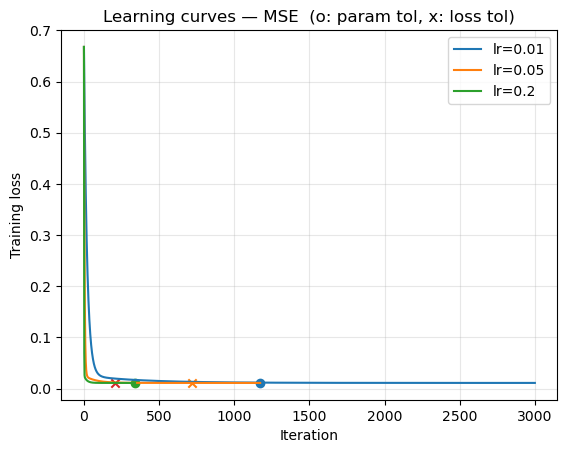


=== HUBER ===
lr=0.01  theta=[0.6768, 0.4844]  final_loss=0.005686  stop(param)=None  stop(loss)=None  iters=3000
lr=0.05  theta=[0.7331, 0.4576]  final_loss=0.005551  stop(param)=2162  stop(loss)=1259  iters=2163
lr=0.2   theta=[0.7333, 0.4575]  final_loss=0.005551  stop(param)=639  stop(loss)=365  iters=640


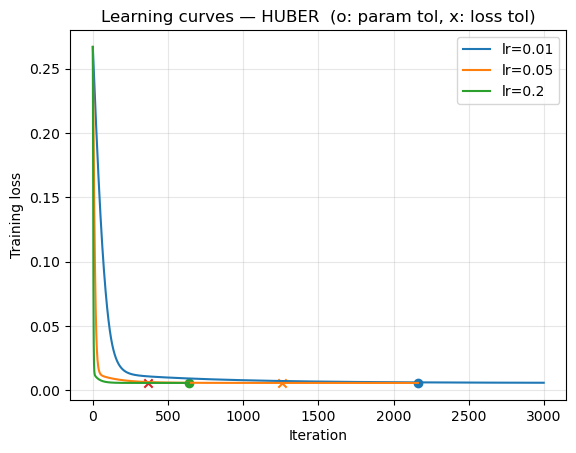

LS  theta: [0.73340398 0.45748571]
GD  theta: [0.73327417 0.45754744]
||GD - LS||: 0.00014374098192651672


In [12]:
import numpy as np
import sys, pandas as pd, openpyxl
print(sys.executable)              # should point to ...\anaconda3\envs\asu\python.exe
print("pandas:", pd.__version__, "openpyxl:", openpyxl.__version__)

from pathlib import Path
import pandas as pd

candidate = Path(r"EEE.csv")
# df = pd.read_excel(candidate, engine="openpyxl")
df = pd.read_csv(candidate)
df.head()

# === RUN EXPERIMENT ===
import numpy as np, matplotlib.pyplot as plt

# Design matrix for y = w*x + b
X = np.c_[df["x"].to_numpy(), np.ones(len(df))]
y = df["y"].to_numpy().reshape(-1,1)

lrs   = [0.01, 0.05, 0.2]
delta = 0.5

for loss in ["mse", "huber"]:
    print(f"\n=== {loss.upper()} ===")
    plt.figure()
    for lr in lrs:
        theta, losses, param_deltas, k_param, k_loss = gd_linear_regression(
            X, y, loss=loss, lr=lr, delta=delta, max_iters=3000,
            tol_param=1e-6, tol_loss=1e-8
        )
        print(f"lr={lr:<4}  theta=[{theta[0,0]:.4f}, {theta[1,0]:.4f}]  "
              f"final_loss={losses[-1]:.6f}  "
              f"stop(param)={k_param}  stop(loss)={k_loss}  iters={len(losses)}")
     # plot curve + markers for stop points
        it = np.arange(len(losses))
        plt.plot(it, losses, label=f"lr={lr}")
        if k_param is not None and k_param < len(losses):
            plt.scatter([k_param], [losses[k_param]], marker='o')   # param tol met
        if k_loss is not None and k_loss < len(losses):
            plt.scatter([k_loss], [losses[k_loss]], marker='x')     # loss tol met

    plt.xlabel("Iteration"); plt.ylabel("Training loss")
    plt.title(f"Learning curves — {loss.upper()}  (o: param tol, x: loss tol)")
    plt.legend(); plt.grid(True, alpha=0.3)
    plt.show()

    theta_ls, *_ = np.linalg.lstsq(X, y, rcond=None)
print("LS  theta:", theta_ls.ravel())

theta_mse, *_ = gd_linear_regression(X, y, loss="mse", lr=0.05, max_iters=3000)
print("GD  theta:", theta_mse.ravel())

print("||GD - LS||:", np.linalg.norm(theta_mse - theta_ls))